## Spectral Clustering and Semi-Supervised Learning

#### This notebook contains different values and imports that can be used in this practical session.
#### Please keep the same variable names when provided in your report to make the work of teaching assistants easier. 
#### You can still change the values given or the sizes of the datasets treated if you believe it is usefull to illustrate your point.

#### You can directly edit the markdown boxes to add your comments and answers to the questions

In [1]:
# Question 1 (imports and advised values):
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import networkx as nx
import numpy as np

n_samples = 200 # You can change these values
noise_level_list = [.05,.1,.2] # You can change these values

### Question 1 : Complete the code in the box below

In [2]:
noisy_moons = make_moons(n_samples = n_samples, noise = 0.2)

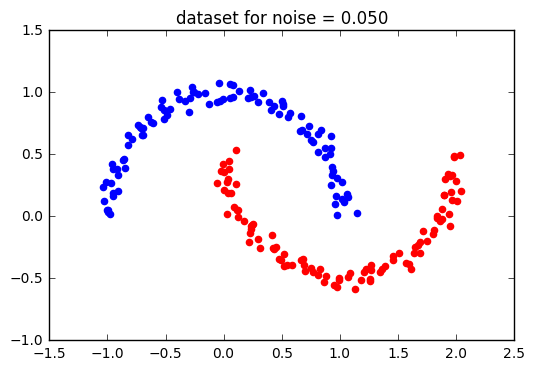

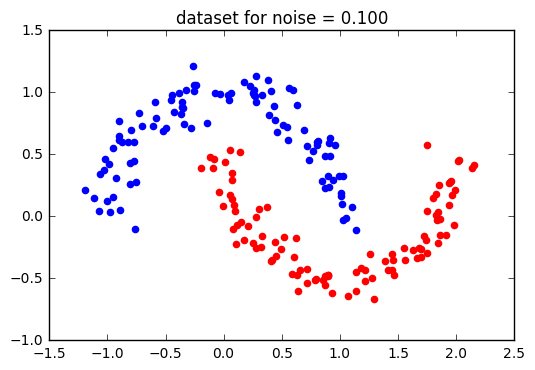

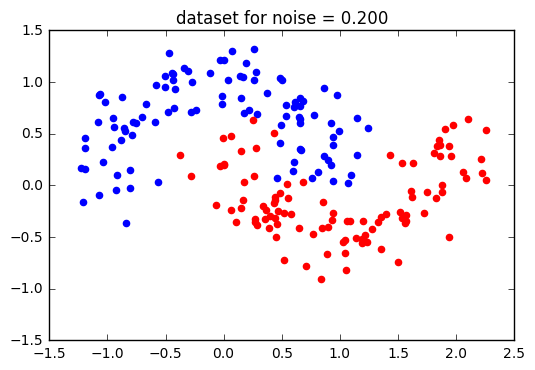

In [3]:
def plot_graph(x):
    colors = ['blue', 'red']
    fig = plt.figure()
    ax = fig.add_subplot(111)
    noisy_moons = make_moons(n_samples = n_samples, noise = x)
    for i in range(len(noisy_moons[0])):
        ax.scatter(noisy_moons[0][i, 0]
                   , noisy_moons[0][i, 1]
                   , color = colors[noisy_moons[1][i]])
    plt.title('dataset for noise = %.3f' %x)
for n in noise_level_list:
    plot_graph(n)

In [4]:
# Question 2 :
from sklearn.neighbors import kneighbors_graph
n_neighbors_list = [1,5,10] # You can change these values

### Question 2 : Complete the code in the box below

In [5]:
noisy_moons = make_moons(n_samples = n_samples, noise = 0.02)
A = []
for i in range(3):
    A.append(kneighbors_graph(noisy_moons[0], n_neighbors_list[i], mode = 'connectivity', include_self=True))
A[1].toarray()

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

Visualize the graph

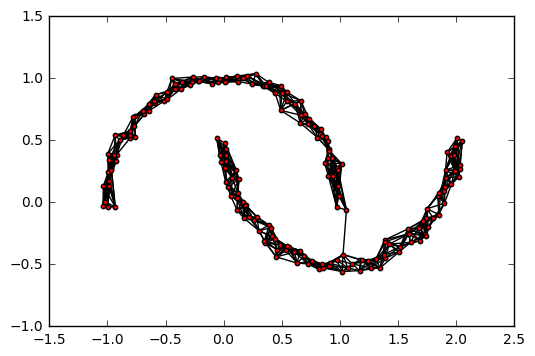

In [6]:
noisy_moons = make_moons(n_samples = n_samples, noise = 0.04)
pos = {}
for i in range(len(noisy_moons[0])):
    pos[i] = (noisy_moons[0][i][0], noisy_moons[0][i][1])

A = kneighbors_graph(noisy_moons[0]
                     , n_neighbors_list[2]
                     , mode = 'connectivity', include_self=True)
G = nx.from_numpy_matrix(A.toarray())

nx.draw_networkx(G, pos, node_size=10, with_labels=False)

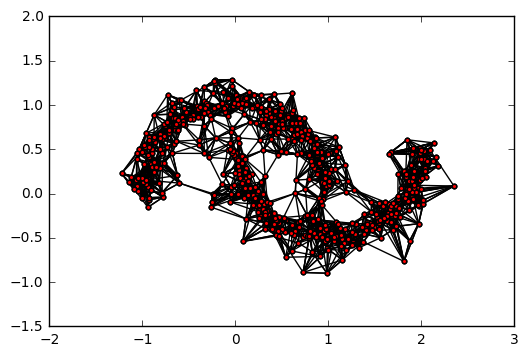

In [7]:
for n in noise_level_list:
    
    noisy_moons = make_moons(n_samples = n_samples, noise = n)
    
    for neighbors in n_neighbors_list:
    
        pos = {}
        for i in range(len(noisy_moons[0])):
            pos[i] = (noisy_moons[0][i][0], noisy_moons[0][i][1])

        A = kneighbors_graph(noisy_moons[0]
                             , neighbors
                             , mode = 'connectivity', include_self=True)
        G = nx.from_numpy_matrix(A.toarray())

        nx.draw_networkx(G, pos, node_size=10, with_labels=False)

Adjacency matrix

In [8]:
from matplotlib import pyplot, patches
def draw_adjacency_matrix(G, node_order=None, partitions=[], colors=[]):
    """
    - G is a netorkx graph
    - node_order (optional) is a list of nodes, where each node in G
          appears exactly once
    - partitions is a list of node lists, where each node in G appears
          in exactly one node list
    - colors is a list of strings indicating what color each
          partition should be
    If partitions is specified, the same number of colors needs to be
    specified.
    """
    adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)

    #Plot adjacency matrix in toned-down black and white
    fig = pyplot.figure(figsize=(5, 5)) # in inches
    pyplot.imshow(adjacency_matrix,
                  cmap="Greys",
                  interpolation="none")
    
    # The rest is just if you have sorted nodes by a partition and want to
    # highlight the module boundaries
    assert len(partitions) == len(colors)
    ax = pyplot.gca()
    for partition, color in zip(partitions, colors):
        current_idx = 0
        for module in partition:
            ax.add_patch(patches.Rectangle((current_idx, current_idx),
                                          len(module), # Width
                                          len(module), # Height
                                          facecolor="none",
                                          edgecolor=color,
                                          linewidth="1"))
            current_idx += len(module)

Noise:  0.05
--------------------
Noise:  0.1
--------------------
Noise:  0.2
--------------------


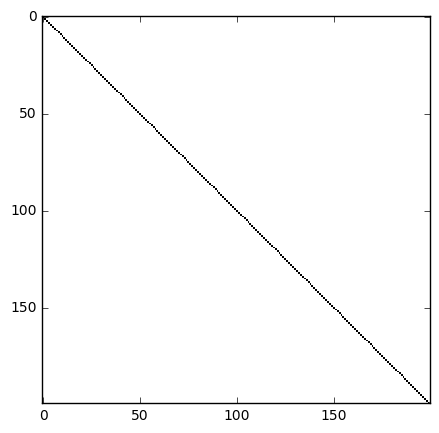

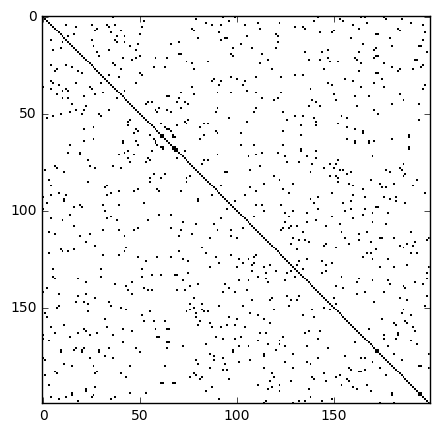

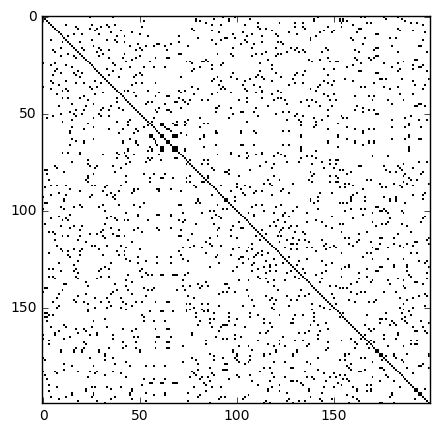

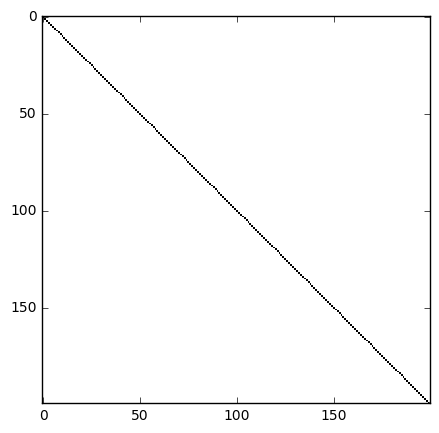

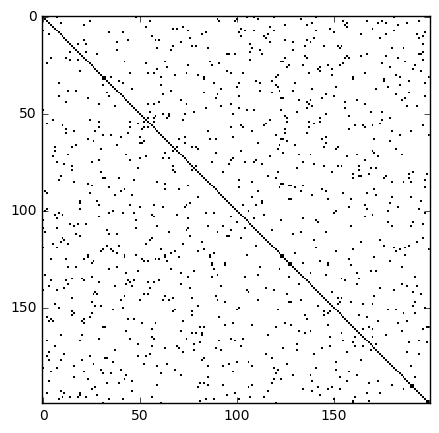

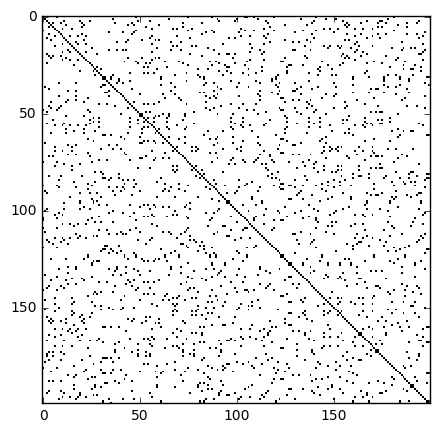

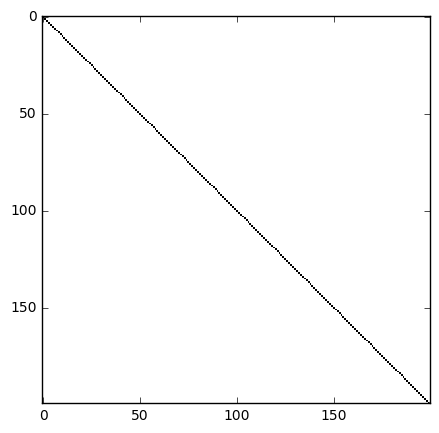

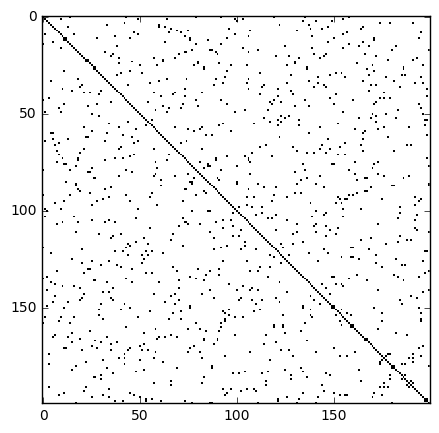

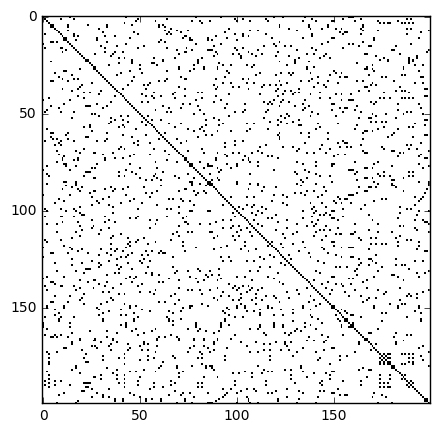

In [9]:
for n in noise_level_list:
    
    noisy_moons = make_moons(n_samples = n_samples, noise = n)
    A = []
    for i in range(len(n_neighbors_list)):
        A.append(kneighbors_graph(noisy_moons[0], n_neighbors_list[i], mode = 'connectivity', include_self=True))
    print('Noise: ', n)
    for i in range(len(n_neighbors_list)):
        G = nx.from_scipy_sparse_matrix(A[i])
        draw_adjacency_matrix(G)
        
        
    print('--------------------')

### Question 3 : Optimization problem 

- $vol(V) = f^TDf$

- $f^TLf = vol(V)Ncut(A, B)$

- solve $min_{f \in R^n}\frac{f^TLf}{f^TDf}$ subject to $f^TD1_n = 0$

### Question 4 : Complete the code in the box below



In [10]:
from sklearn.cluster import SpectralClustering

In [11]:
noisy_moons = make_moons(n_samples = n_samples, noise = 0.02)
# A = kneighbors_graph(noisy_moons[0], n_neighbors_list[1]
#                  , mode = 'connectivity', include_self=True)
X = noisy_moons[0]

In [12]:
model = SpectralClustering(n_clusters = 2)
model.fit(X)
data = model.fit_predict(X)

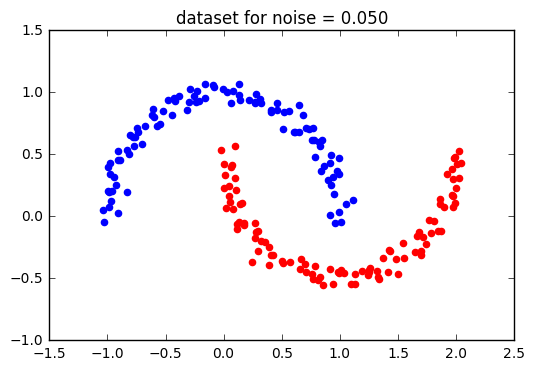

In [13]:
def plot_cluster(noise, cluster, neighbors):
    
    model = SpectralClustering(n_clusters = cluster, affinity = 'nearest_neighbors'
                               , n_neighbors = neighbors)
    X = make_moons(n_samples = n_samples, noise = noise)
    model.fit(X[0])
    data = model.fit_predict(X[0])
    colors = ['blue', 'red', 'green', 'pink', 'grey', 'orange', 'gold']
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for i in range(len(X[0])):
        ax.scatter(X[0][i, 0]
                   , X[0][i, 1]
                   , color = colors[data[i]])
    plt.title('dataset for noise = %.3f' %noise)
    model.affinity
plot_cluster(0.05, 2, 10)

### Question 5 : Complete the code in the box below

In [14]:
def similarity(C_1, C_2):
    return (C_1*C_2).sum() / np.sqrt((C_1*C_1).sum() * (C_2*C_2).sum())

def compute_C(clustering):
    
    elements = {}
    for element in set(clustering):
        elements[element] = []
        for i in range(len(clustering)):
            if clustering[i] == element:
                elements[element].append(i)
    C = np.zeros((len(clustering), len(clustering)))
    for i in elements.keys():
        for j in range(len(elements[i])):
            for k in range(len(elements[i])):
                C[j, k] = 1
    return C

In [15]:
# Define parameters
f = 0.8
num_subsamples = 20
k_max = 40
S = np.zeros((num_subsamples, k_max))
noise = 0.001

# Create initial dataset
X = make_moons(n_samples = n_samples, noise = noise)[0]
bootstrap = []

# Bootstrap on the initial dataset
for i in range(num_subsamples):
    idx = np.random.randint(len(X), size=f*len(X))
    bootstrap.append([X[idx, :], idx])

# Loop on different values of clusters
for k in range(2, k_max + 1):
    
    # clustering for initial X
    model = SpectralClustering(n_clusters = k, affinity = 'nearest_neighbors'
                               , n_neighbors = neighbors)   
    model.fit(X)
    clustering_X = model.fit_predict(X)
    
    for i in range(num_subsamples):
    
        # clustering for boostrapped partition
        model = SpectralClustering(n_clusters = k, affinity = 'nearest_neighbors'
                                   , n_neighbors = neighbors)
        model.fit(bootstrap[i][0])
        affinity = model.affinity_matrix_
        clustering = model.fit_predict(bootstrap[i][0])
        C_bootstrap = compute_C(clustering)
        
        # We take the same points in initial as in the bootstrapped to have the 
        # same number of points
        C_initial = compute_C(clustering_X[idx])
        
        S[i, k-1] = similarity(C_bootstrap, C_initial)

C:\Users\Peter martigny\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Peter martigny\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:217: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


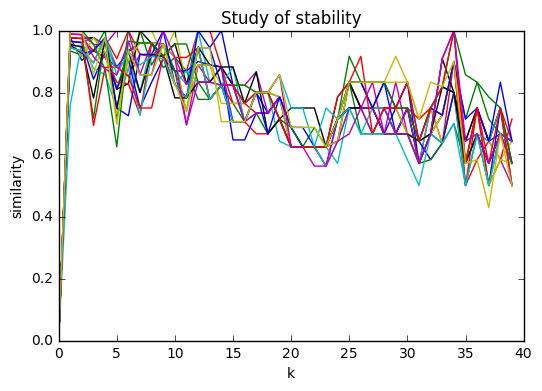

In [16]:
for i in range(num_subsamples):
    plt.plot(S[i])
    plt.xlabel('k')
    plt.ylabel('similarity')
    plt.title('Study of stability')

### Question 6 : Complete the code in the box below

### Question 7 : Complete the code in the box below

In [25]:
from sklearn.cluster import AgglomerativeClustering

# Define parameters
f = 0.8
num_subsamples = 20
k_max = 40
S = np.zeros((num_subsamples, k_max))
noise = 0.001

# Create initial dataset
X = make_moons(n_samples = n_samples, noise = noise)[0]
bootstrap = []

# Bootstrap on the initial dataset
for i in range(num_subsamples):
    idx = np.random.randint(len(X), size=f*len(X))
    bootstrap.append([X[idx, :], idx])

# Loop on different values of clusters
for k in range(2, k_max + 1):
    
    # clustering for initial X
    model = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean')   
    model.fit(X)
    clustering_X = model.fit_predict(X)
    
    for i in range(num_subsamples):
    
        # clustering for boostrapped partition
        model = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean')
        model.fit(bootstrap[i][0])
#         affinity = model.affinity_matrix_
        clustering = model.fit_predict(bootstrap[i][0])
        C_bootstrap = compute_C(clustering)
        
        # We take the same points in initial as in the bootstrapped to have the 
        # same number of points
        C_initial = compute_C(clustering_X[idx])
        
        S[i, k-1] = similarity(C_bootstrap, C_initial)

C:\Users\Peter martigny\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


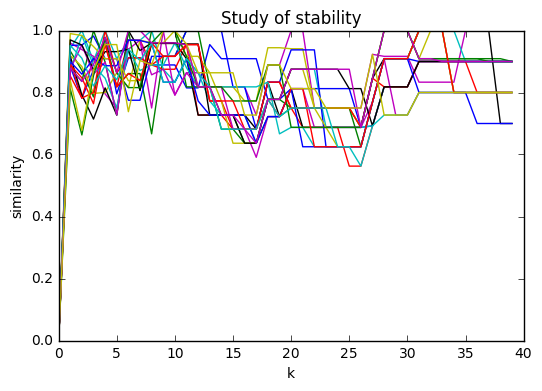

In [28]:
for i in range(num_subsamples):
    plt.plot(S[i])
    plt.xlabel('k')
    plt.ylabel('similarity')
    plt.title('Study of stability')

### Experiment on MNIST

In [30]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [32]:
mnist.data.shape, mnist.target.shape, np.unique(mnist.target)

((70000, 784),
 (70000,),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]))

In [ ]:
# from sklearn.cluster import AgglomerativeClustering

# # Define parameters
# f = 0.8
# num_subsamples = 20
# k_max = 40
# S = np.zeros((num_subsamples, k_max))
# noise = 0.001

# # Create initial dataset
# X = mnist.data
# bootstrap = []

# # Bootstrap on the initial dataset
# for i in range(num_subsamples):
#     idx = np.random.randint(len(X), size=f*len(X))
#     bootstrap.append([X[idx, :], idx])

# # Loop on different values of clusters
# for k in range(2, k_max + 1):
    
#     # clustering for initial X
#     model = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean')   
#     model.fit(X)
#     clustering_X = model.fit_predict(X)
    
#     for i in range(num_subsamples):
    
#         # clustering for boostrapped partition
#         model = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean')
#         model.fit(bootstrap[i][0])
# #         affinity = model.affinity_matrix_
#         clustering = model.fit_predict(bootstrap[i][0])
#         C_bootstrap = compute_C(clustering)
        
#         # We take the same points in initial as in the bootstrapped to have the 
#         # same number of points
#         C_initial = compute_C(clustering_X[idx])
        
#         S[i, k-1] = similarity(C_bootstrap, C_initial)

## Semi-Supervised Learning

Choice of the dataset used : **Precise** which dataset you chose and why it is relevant for the semi-supervised learning Task

Advised datasets :

*Breast Cancer Wisconsin (Diagnostic) Database*

*MNIST binary even vs odd (multiple clusters inside each class)*

Feel free to use other datasets if they are relevant

In [ ]:
from sklearn.datasets import load_breast_cancer, load_digits
from sklearn.model_selection import train_test_split


### For all the next questions, use Cancer and Mnist classes to handle your data if you choose to use these one,
### You can also add more datasets but we advise you to handle them with this class for better readability
class semi_sup_dat:
    def __init__(self,data,p_unlabelled,name):
        # DON T CHANGE THE RANDOM STATES
        self.name = name
        if self.name == 'Mnist':
            # do an even vs odd binary classification :
            even = [0,2,4,6,8]
            Y = [int(y in even) for y in data.target]
        else:
            Y = data.target
        X_lab, X_unlab, y_lab, y_unlab = train_test_split(data.data, data.target, test_size=p_unlabelled, random_state=32)
        self.X_lab = X_lab
        self.X_unlab = X_unlab
        self.y_lab = y_lab
        self.y_unlab = y_unlab


# The following lines can be called later in the code to build a dataset with varying unlabelled proportion
p_unlabelled = 0.8 # You can change this value
Cancer = semi_sup_dat(load_breast_cancer(), p_unlabelled,'Cancer')
digits = load_digits()

Mnist = semi_sup_dat(load_digits(), p_unlabelled,'Mnist')

### Question 9 : Complete the code in the box below

In [ ]:
#  Question 9  : Complete the function self_training
from sklearn.neighbors import KNeighborsClassifier





### Question 10 : Complete the code in the box below

###### Closed form expression :

-

-

-

In [ ]:
from sklearn.metrics.pairwise import rbf_kernel # Or reimplement it yourself if your prefer
from scipy.linalg import block_diag

    

### Question 11 : Complete the code in the box below

### Question 12 : Add your answer here

-

-

-

### Question 13 : Complete the code in the box below

### Question 14 : Complete the code in the box below

##### Add your answer to the question here :

-

-

-

### Question 15 : Complete the code in the box below

### Question 16 : Complete the code in the box below

###### Describe your protocol here : 
-

-

-